Chargement de libraries nécessaires

In [1]:
!pip install tensorflow_io
!pip install bm3d

     |████████████████████████████████| 24.1MB 121kB/s 
     |████████████████████████████████| 2.5MB 36.3MB/s 
     |████████████████████████████████| 8.4MB 4.1MB/s 


Liaison de Google Colab avec Google Drive pour recupérer le modèle et les modules utiles

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Chargement des modules utiles

In [4]:
from drive.MyDrive.utils.data_utils import *
from drive.MyDrive.utils.models import *
import bm3d

Chargement du modèle

In [6]:
from tensorflow import keras
unet = keras.models.load_model('drive/MyDrive/denoising/unet_model')

Visualisation de l'image bruitée

In [10]:
image_path = './drive/MyDrive/1.tif'
image_np = tif_to_np(image_path)
visualize(image_np)

interactive(children=(IntSlider(value=9, description='layer', max=19), Output()), _dom_classes=('widget-intera…

### Machine Learning (U-NET)

Application du modèle sur l'image bruitée et visualisation du résultat

In [11]:
denoised_image = test_tif(image_path, unet)
visualize(denoised_image)

interactive(children=(IntSlider(value=9, description='layer', max=19), Output()), _dom_classes=('widget-intera…

In [13]:
denoised_image.shape

(256, 256, 20)

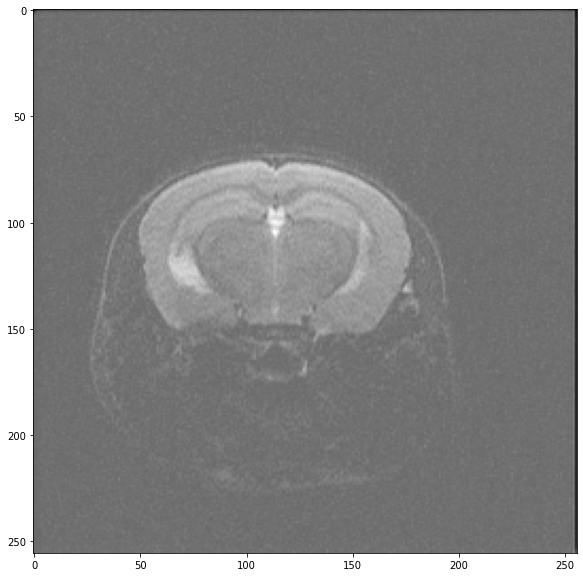

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(np.squeeze(denoised_image)[:,:,11], cmap='gray')

In [15]:
plt.imsave('souris.png',np.squeeze(denoised_image)[:,:,11], cmap='gray')

### Méthode classique de débruitage : Block Matching and 3D Filtering (BM3D)

Application de la méthode BM3D et visualisation du résultat

In [16]:
denoised_image_bm3d = bm3d.bm3d(image_np, sigma_psd=25, stage_arg=bm3d.BM3DStages.ALL_STAGES) 
visualize(denoised_image_bm3d)

interactive(children=(IntSlider(value=9, description='layer', max=19), Output()), _dom_classes=('widget-intera…